In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_table = pd.DataFrame({'Peso': np.array([40.0, 93.5, 35.5, 30.0, 52.0, 17.0, 38.5,  8.5, 33.0,  9.5, 21.0, 79.0]) / 2.205,
                            'Altura': np.array([42.8, 63.5, 37.5, 39.5, 45.5, 38.5, 43.0, 22.5, 37.0, 23.5, 33.0, 58.0]) / 39.37,
                            'Cateter': [37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47]},
                            dtype='float')

In [3]:
data_table

,Peso,Altura,Cateter
0,18.140590,1.087122,37.0
1,42.403628,1.612903,50.0
2,16.099773,0.952502,34.0
3,13.605442,1.003302,36.0
4,23.582766,1.155702,43.0
5,7.709751,0.977902,28.0
6,17.460317,1.092202,37.0
7,3.854875,0.571501,20.0
8,14.965986,0.939802,34.0
9,4.308390,0.596901,30.0


In [4]:
def normalization(matrix, vector):
    #Mean calculation
    mVector = np.mean(vector, axis=0)
    mMatrix = np.mean(matrix, axis=0)
    
    #Standard deviation
    stdVector = np.std(vector, axis = 0)
    stdMatrix = np.std(matrix, axis = 0)
     
    #Normalization of data
    vector = (vector - mVector)/stdVector
    matrix = (matrix - mMatrix)/stdMatrix
    
    return matrix, vector

In [5]:
matrix_x = np.array(data_table[['Peso', 'Altura']])
vetor_y = np.array(data_table['Cateter'])

In [6]:
matrix_x, vetor_y = normalization(matrix_x, vetor_y)

In [7]:
def gradienteDescendente(matrix_x, vetor_y, epocas, alfa):
    
    matrix_x = np.insert(matrix_x, 0, 1, axis =1)

    w_matrix = np.ones((matrix_x.shape[1],), dtype=float)
    y_chapeu = matrix_x.dot(w_matrix)
    mse = []
    for epoca in range(epocas):
        somatorio = 0
        for i in range(matrix_x.shape[0]):
            somatorio += (vetor_y[i] - y_chapeu[i]) * matrix_x[i]

        mse.append((-1/matrix_x.shape[0]) * somatorio)
        w_matrix = w_matrix + (alfa/matrix_x.shape[0])*somatorio
        y_chapeu = matrix_x.dot(w_matrix)

    return w_matrix, mse      

In [8]:
w, mse = gradienteDescendente(matrix_x, vetor_y, 10000, 0.001)

In [9]:
w

array([4.51733460e-05, 5.06796889e-01, 4.09680295e-01])

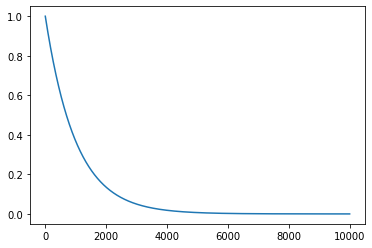

In [10]:
plt.plot(list(range(0, len(mse))), [item[0] for item in mse])
plt.show()

In [11]:
matrix_x

array([[ 0.07515517,  0.21366613],
       [ 2.21958262,  2.02508821],
       [-0.10521723, -0.25012793],
       [-0.32567239, -0.0751113 ],
       [ 0.55614824,  0.44993858],
       [-0.84674822, -0.16261962],
       [ 0.01503103,  0.23116779],
       [-1.18745165, -1.56275262],
       [-0.20542413, -0.29388208],
       [-1.14736889, -1.47524431],
       [-0.6864172 , -0.64391534],
       [ 1.63838266,  1.54379249]])

In [12]:
def gradiente_estocastico(matrix_x, vetor_y, epocas, alfa):
    
    matrix_x = np.insert(matrix_x, 0, 1, axis =1)

    w_matrix = np.ones((matrix_x.shape[1],), dtype=float)
    y_chapeu = matrix_x.dot(w_matrix)
    data =np.append(matrix_x, np.split(vetor_y, matrix_x.shape[0], axis=0), axis=1)
    mse = []

    for epoca in range(epocas):
        erro = 0
        somatorio = 0
        for i in range(matrix_x.shape[0]):
            w_matrix  = w_matrix + alfa * (vetor_y[i] - y_chapeu[i]) * matrix_x[i]
            somatorio += (vetor_y[i] - y_chapeu[i]) * matrix_x[i]
        
        mse.append((-1/matrix_x.shape[0]) * somatorio)        
        data = np.random.permutation(data)
        matrix_x = data[: ,0:3]
        vetor_y = data[:,3]
        
        y_chapeu = matrix_x.dot(w_matrix)  
    
    return w_matrix, mse
    

In [13]:
w, mse = gradiente_estocastico(matrix_x, vetor_y, 12000, 0.001)

In [14]:
w

array([3.67869797e-16, 6.08338901e-01, 3.08138280e-01])

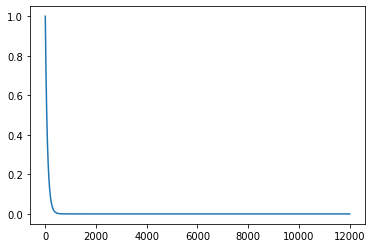

In [16]:
plt.plot(list(range(0, len(mse))), [item[0] for item in mse])
plt.show()

In [17]:
def regressao_analitica(matrix_x, vetor_y):
    a = np.linalg.inv(np.transpose(matrix_x).dot(matrix_x)).dot(np.transpose(matrix_x))
    w = np.linalg.inv(np.transpose(matrix_x).dot(matrix_x)).dot(np.transpose(matrix_x)).dot(vetor_y)
    #custo = 1/2 * ((np.linalg.inv(vetor_y - matrix_x.dot(w))).dot((vetor_y - matrix_x.dot(w)))) erro não sei porque
    y_chapeu = matrix_x.dot(w)

    custo = 1/2 * (np.transpose((vetor_y- y_chapeu)).dot((vetor_y -y_chapeu)))
    return w, custo

In [18]:
w, c= regressao_analitica(matrix_x, vetor_y)

In [19]:
print(w)

[0.60889388 0.3075833 ]


In [20]:
print(c)

1.0478566570309578


In [21]:
def gradient_descent_multiclass(matrix_x, vetor_y, epocas, alfa):
    matrix_x = np.insert(matrix_x, 0, 1, axis =1)
    
    size = (vector_y.shape[1], matrix_x.shape[1])
    w_matrix = np.ones(size, dtype=float)

    #mse = []
    for k in range(w_matrix.shape[0]): 
        
        y_chapeu = w_matrix[k].dot(np.transpose(matrix_x))
        
        for epocas in range(epocas):
            somatorio = 0
            for i in range(matrix_x.shape[0]):
                somatorio += (vetor_y[i][k] - y_chapeu[i]) * matrix_x[i]

            #mse.append((-1/matrix_x.shape[0]) * somatorio)
            w_matrix[k] = w_matrix[k] + (alfa/matrix_x.shape[0])*somatorio
            y_chapeu = w_matrix[k].dot(np.transpose(matrix_x))

    return w_matrix, mse  
    

In [22]:
def gradiente_estocastico(matrix_x, vetor_y, epocas, alfa):
   
    matrix_x = np.insert(matrix_x, 0, 1, axis =1)

    size = (vector_y.shape[1], matrix_x.shape[1])
    w_matrix = np.ones(size, dtype=float)

    data =np.append(matrix_x, vetor_y, axis=1)
    mse = []

    for k in range(w_matrix.shape[0]): 
        
        y_chapeu = w_matrix[k].dot(np.transpose(matrix_x))

        for epoca in range(epocas):
            erro = 0
            #somatorio = 0
            for i in range(matrix_x.shape[0]):
                w_matrix[k]  = w_matrix[k] + alfa * (vetor_y[i][k] - y_chapeu[i]) * matrix_x[i]
                #somatorio += (vetor_y[i] - y_chapeu[i]) * matrix_x[i]

            #mse.append((-1/matrix_x.shape[0]) * somatorio)        
            data = np.random.permutation(data)
            matrix_x = data[:,0:matrix_x.shape[1]]
            vetor_y = data[:,matrix_x.shape[1]:]

            y_chapeu = w_matrix[k].dot(np.transpose(matrix_x))
    
    return w_matrix, mse
    